In [2]:
#Importing the relevant libraries to do the data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score


# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [3]:
# read csv (comma separated value) into data
file= r"C:\Users\yvams\Desktop\Tetuan City power consumption.csv"
data = pd.read_csv(file)
data['sum']=data['Zone 1 Power Consumption']+data['Zone 2  Power Consumption']+data['Zone 3  Power Consumption']

In [4]:
data.head()

DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption          sum  
0                20240.96386  70425.53544  
1                20131.08434  69320.84387  
2                19668.43373  67803.22193  
3                18899.27711  65489.23209  
4                18442.40964  63650.44627

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
 9   sum                        52416 non-null  float64
dtypes: float64(9), object(1)
memory usage: 4.0+ MB


In [6]:
data.describe()

Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000              13895.696200                8560.081466   
25%         0.122000              26310.668692               16980.766032   
50%         4.456000              32265.920340               20823.168405   
75%       101.000000              37309.018185               24713.717520   
max       936.000000              52204.395120               37408.860760   

       Zone 3  Power Consumption            sum  
count               52416.000000   52416.000000  
mean                17835.406218   71222.885864  
std                  6622.165099   17143.138964  
min                  5935.174070   36785.039739  
25%                 13129.326630   56499.074640  
50%                 16415.117470   69788.790940  
75%                 21624.100420   83749.172310  
max                 47598.326360  134208.145950

In [7]:
from datetime import datetime
#Converting object to datetime datatype
data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
 9   sum                        52416 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 4.0 MB


In [9]:
#transforming DateTime column into index
data = data.set_index('DateTime')

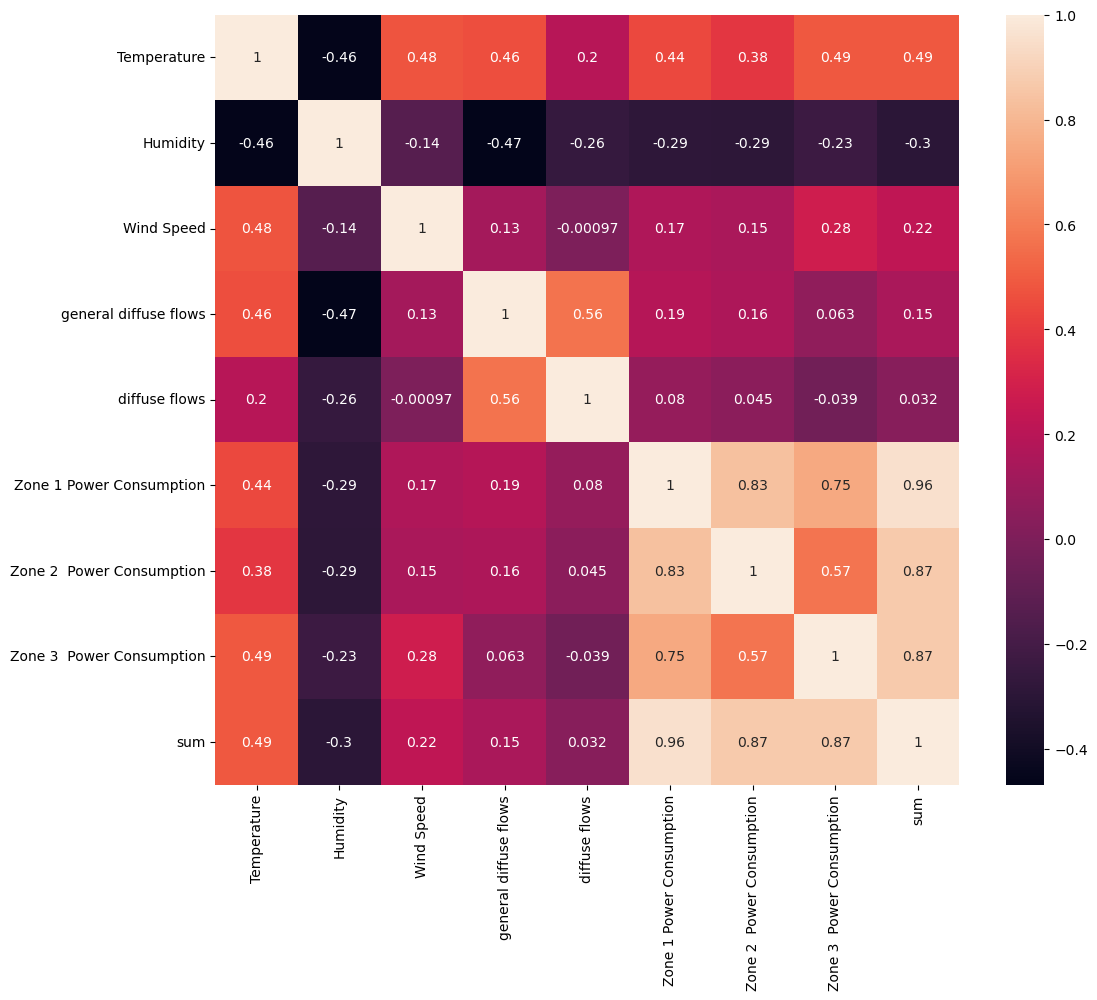

In [10]:
# HeatMap to check the correlation
fig,ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(),annot = True,ax = ax);

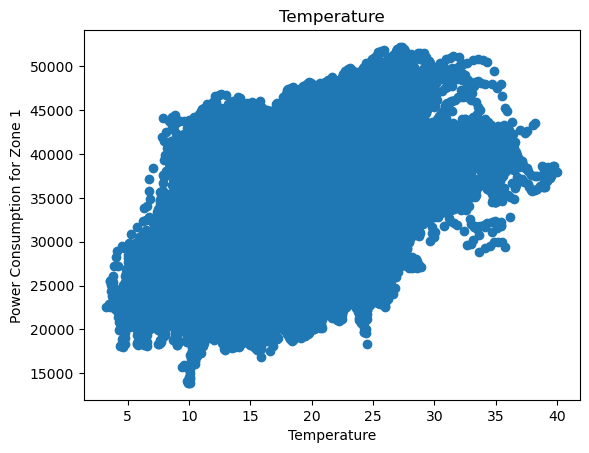

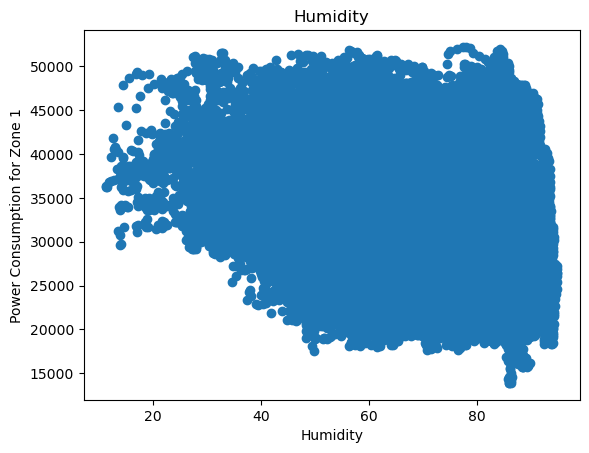

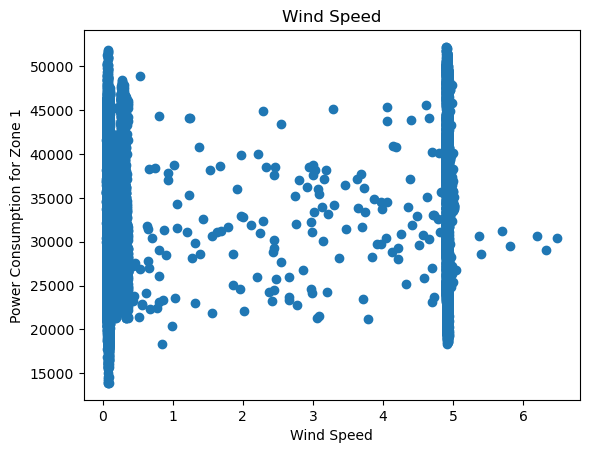

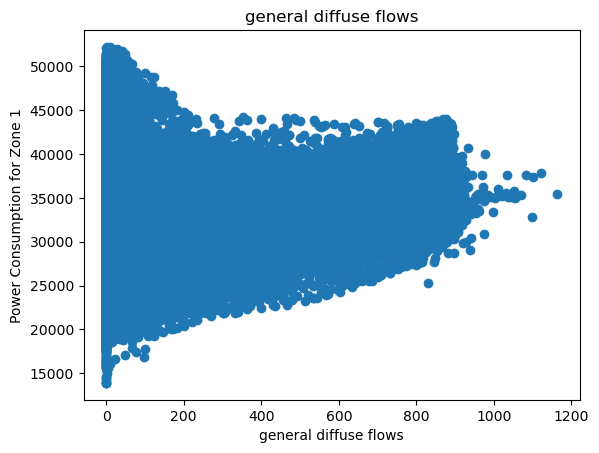

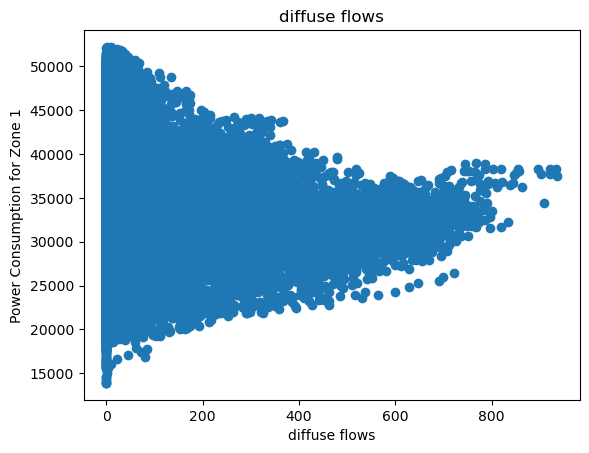

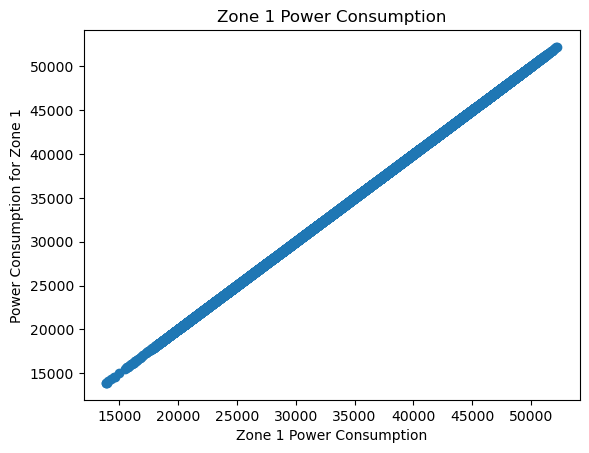

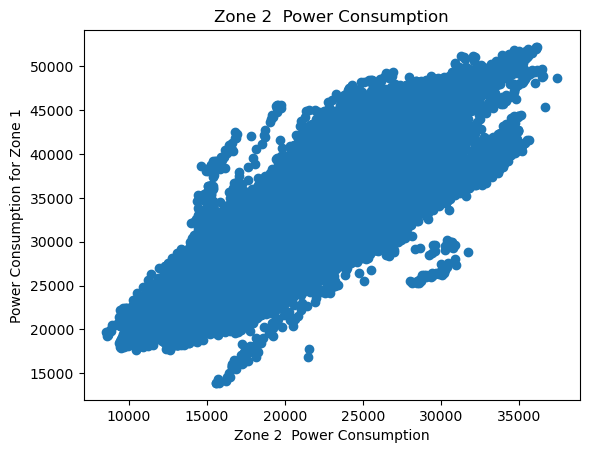

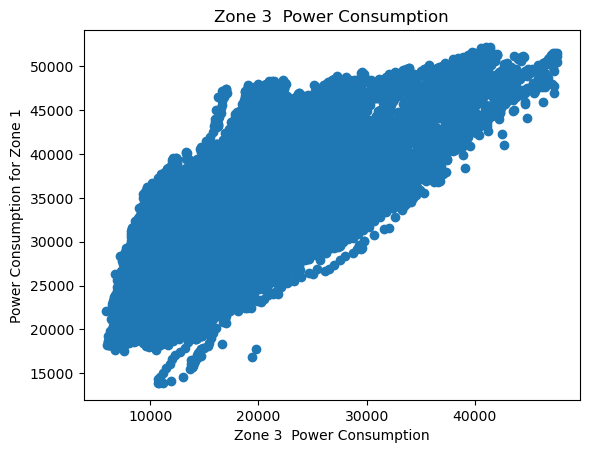

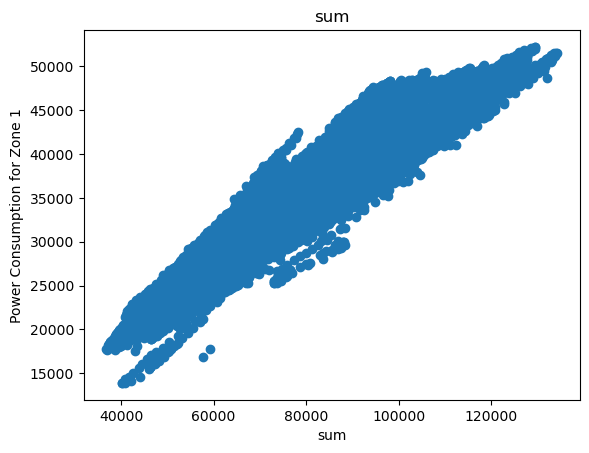

In [11]:
for label in data.columns[:]:
  plt.scatter(data[label], data["Zone 1 Power Consumption"])
  plt.title(label)
  plt.ylabel("Power Consumption for Zone 1")
  plt.xlabel(label)
  plt.show()

In [12]:
def create_features(df):
    """
    Create time series features like hour, month, year, day, etc. based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(data)

In [13]:
df.head()


Temperature  Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                        
2017-01-01 00:00:00        6.559      73.8       0.083                  0.051   
2017-01-01 00:10:00        6.414      74.5       0.083                  0.070   
2017-01-01 00:20:00        6.313      74.5       0.080                  0.062   
2017-01-01 00:30:00        6.121      75.0       0.083                  0.091   
2017-01-01 00:40:00        5.921      75.7       0.081                  0.048   

                     diffuse flows  Zone 1 Power Consumption  \
DateTime                                                       
2017-01-01 00:00:00          0.119               34055.69620   
2017-01-01 00:10:00          0.085               29814.68354   
2017-01-01 00:20:00          0.100               29128.10127   
2017-01-01 00:30:00          0.096               28228.86076   
2017-01-01 00:40:00          0.085               27335.69620   

                     Zone 2  Power Consumption  Zone 3  Power Consumption  \
DateTime                                                                    
2017-01-01 00:00:00                16128.87538                20240.96386   
2017-01-01 00:10:00                19375.07599                20131.08434   
2017-01-01 00:20:00                19006.68693                19668.43373   
2017-01-01 00:30:00                18361.09422                18899.27711   
2017-01-01 00:40:00                17872.34043                18442.40964   

                             sum  hour  dayofweek  quarter  month  year  \
DateTime                                                                  
2017-01-01 00:00:00  70425.53544     0          6        1      1  2017   
2017-01-01 00:10:00  69320.84387     0          6        1      1  2017   
2017-01-01 00:20:00  67803.22193     0          6        1      1  2017   
2017-01-01 00:30:00  65489.23209     0          6        1      1  2017   
2017-01-01 00:40:00  63650.44627     0          6        1      1  2017   

                     dayofyear  dayofmonth  weekofyear  
DateTime                                                
2017-01-01 00:00:00          1           1          52  
2017-01-01 00:10:00          1           1          52  
2017-01-01 00:20:00          1           1          52  
2017-01-01 00:30:00          1           1          52  
2017-01-01 00:40:00          1           1          52

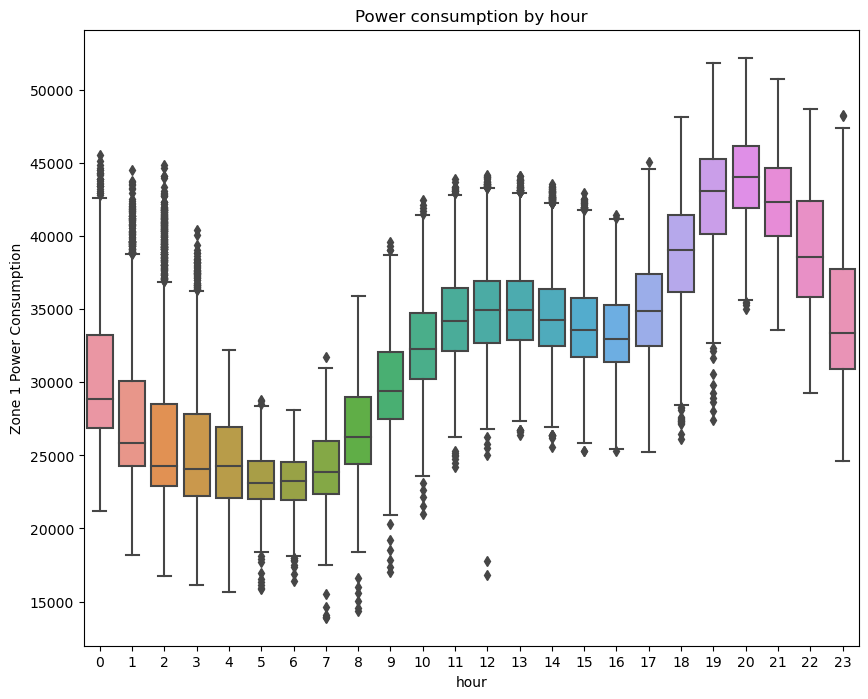

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by hour')
plt.show()

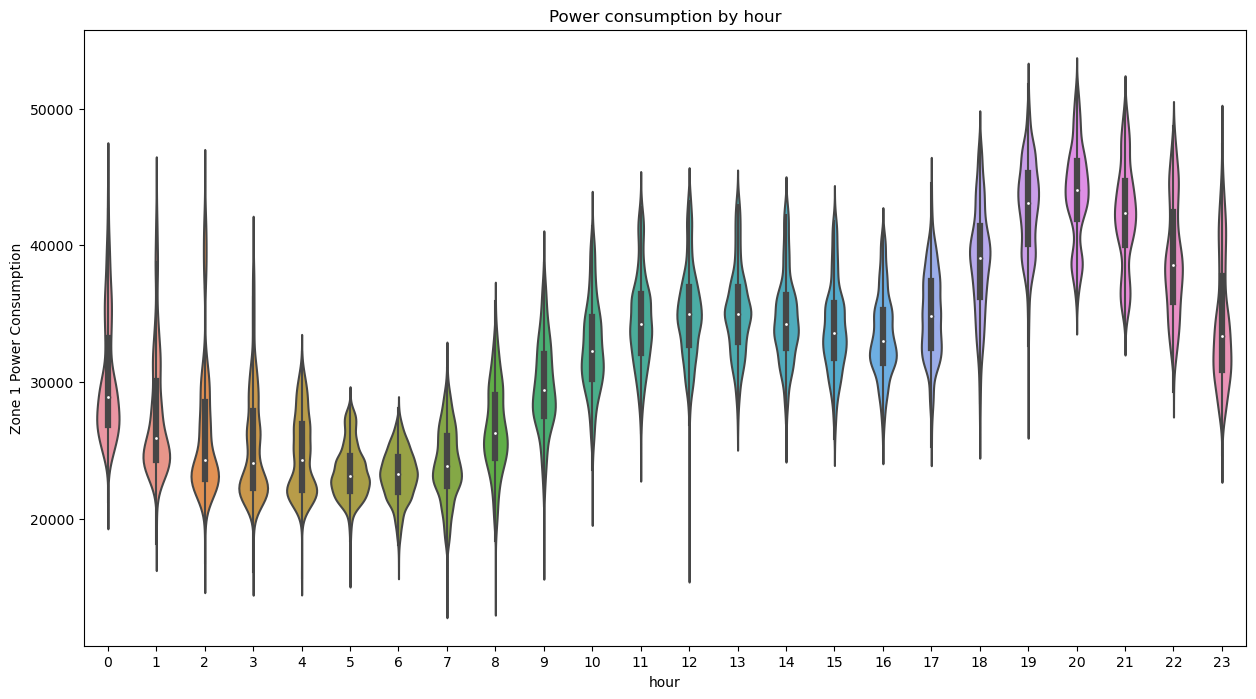

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=df, x='hour', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by hour')
plt.show()

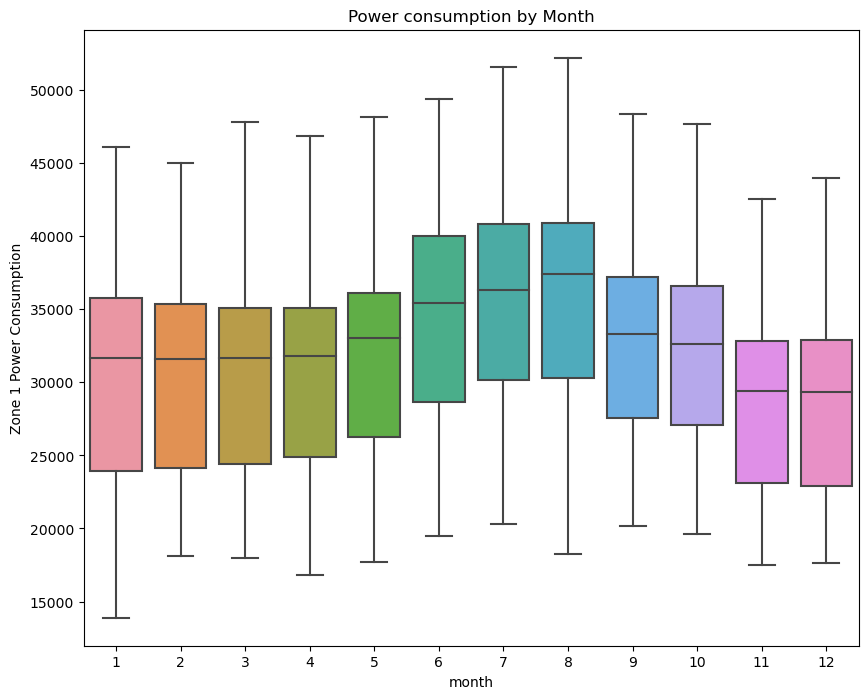

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Month')
plt.show()


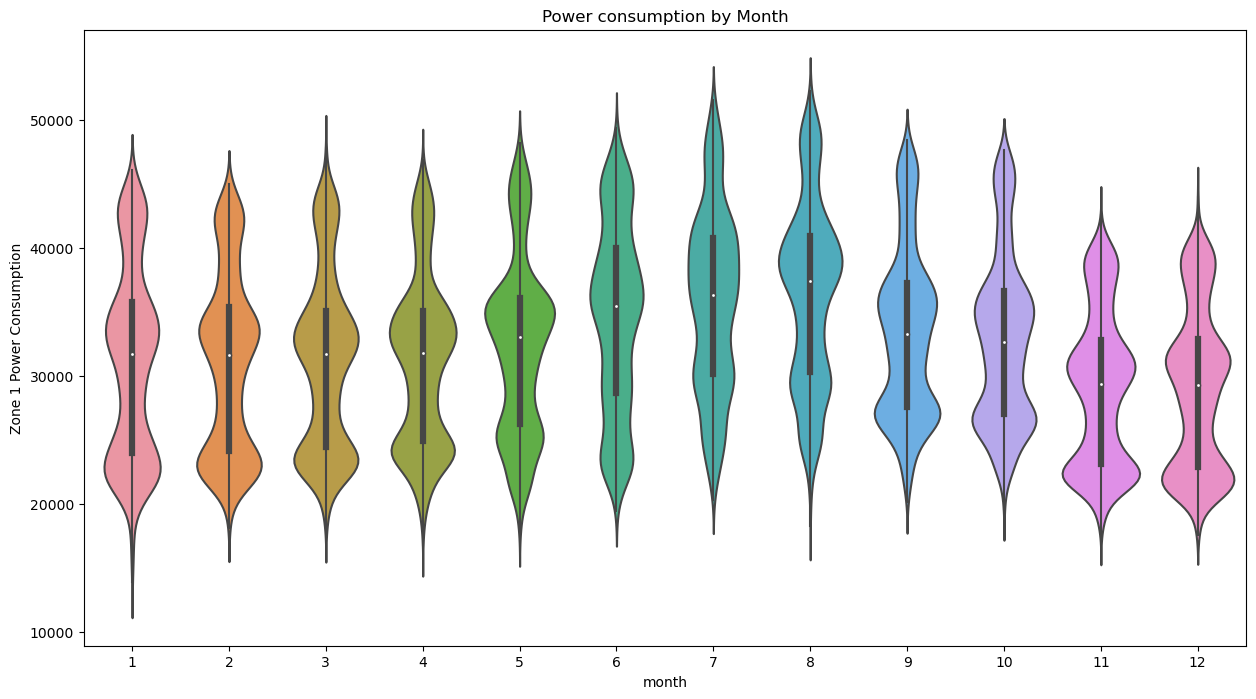

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=df, x='month', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Month')
plt.show()


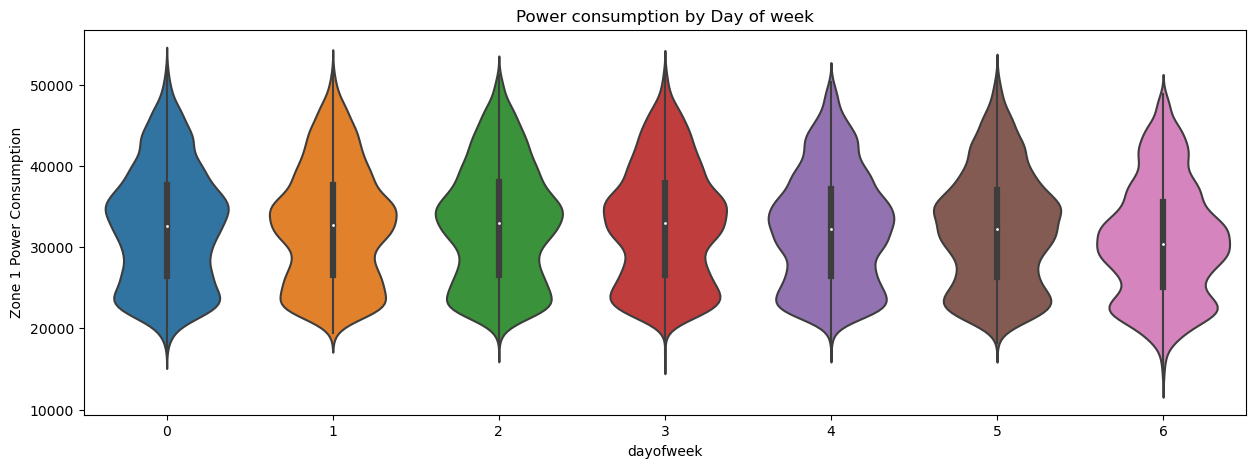

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(data=df, x='dayofweek', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Day of week')
plt.show()

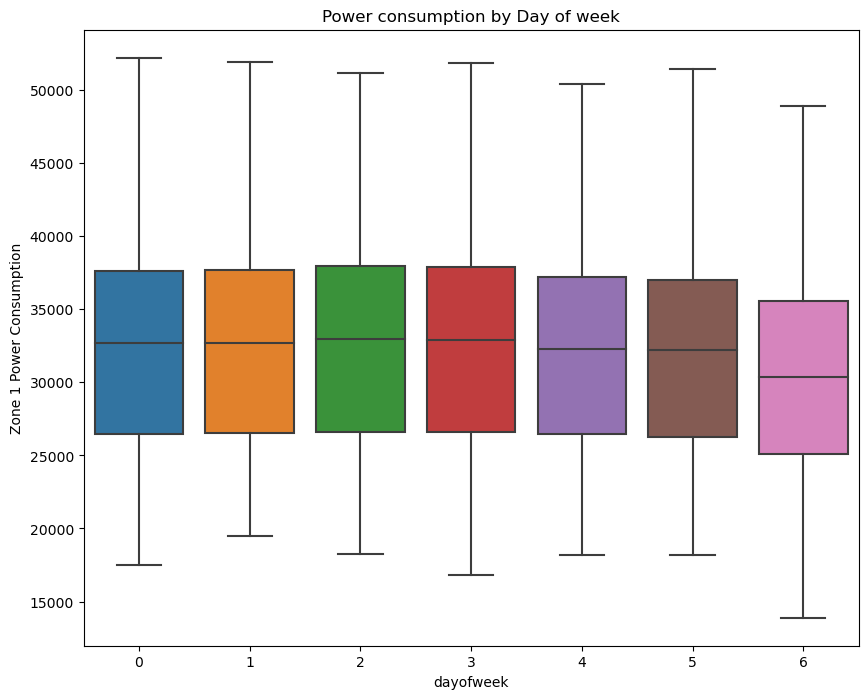

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Day of week')
plt.show()

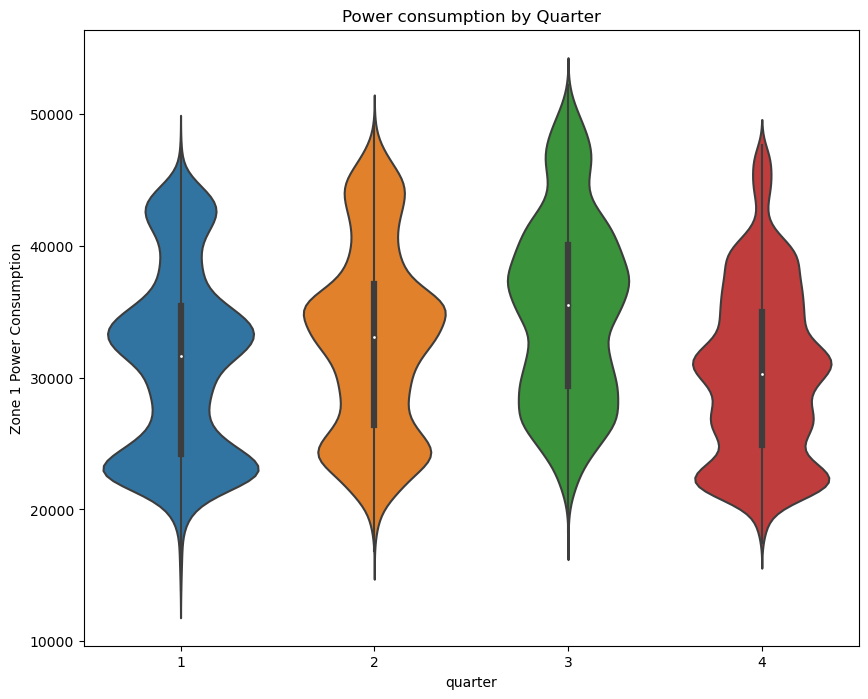

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(data=df, x='quarter', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Quarter')
plt.show()


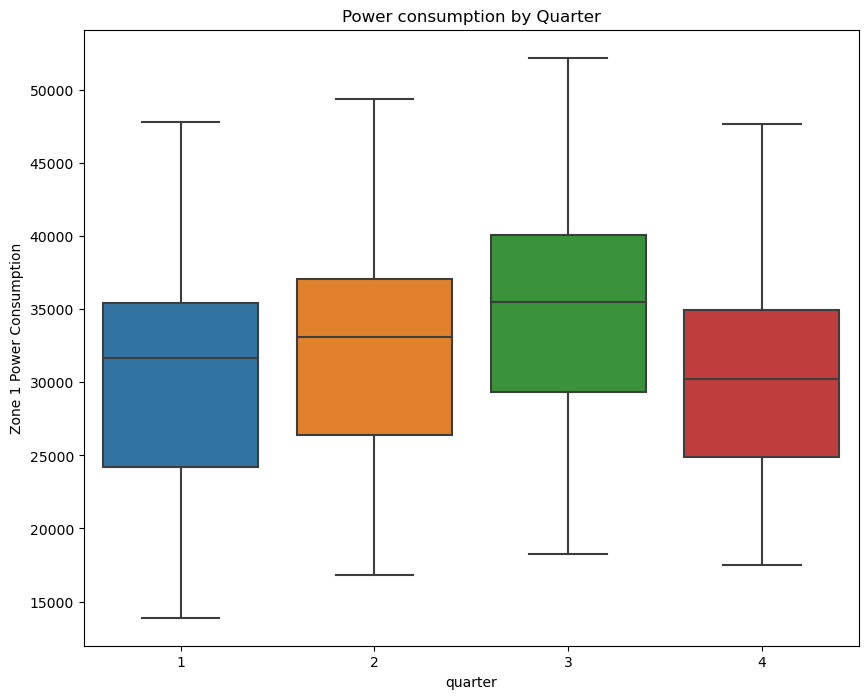

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Quarter')
plt.show()



In [22]:
from statsmodels.tsa.stattools import adfuller
X=df['Zone 1 Power Consumption'].values
result=adfuller(X)
print('ADF stats: %f'%result[0])
print('p-value:%f'%result[1])

print('critical value:')
for key, value in result[4].items():
    print(f'{key},{value}')

ADF stats: -32.121279
p-value:0.000000
critical value:
1%,-3.4304749044184266
5%,-2.861595205242518
10%,-2.566799383915253


In [23]:
df['SMA30'] = df['Zone 1 Power Consumption'].rolling(30).mean()
df['SMA15'] = df['Zone 1 Power Consumption'].rolling(15).mean()

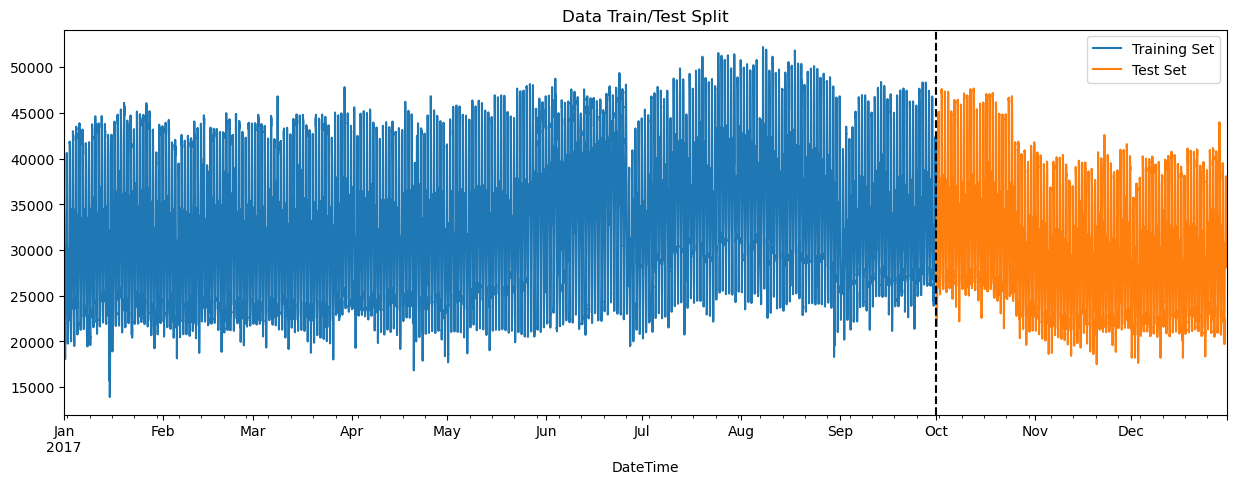

In [24]:
#Training and testing data for regression models
train_data = df.loc[:'10-01-2017',['Zone 1 Power Consumption']]

test_data = df.loc['10-01-2017':, ['Zone 1 Power Consumption']]

fig, ax = plt.subplots(figsize=(15, 5))
train_data.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_data.plot(ax=ax, label='Test Set')
ax.axvline('10-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

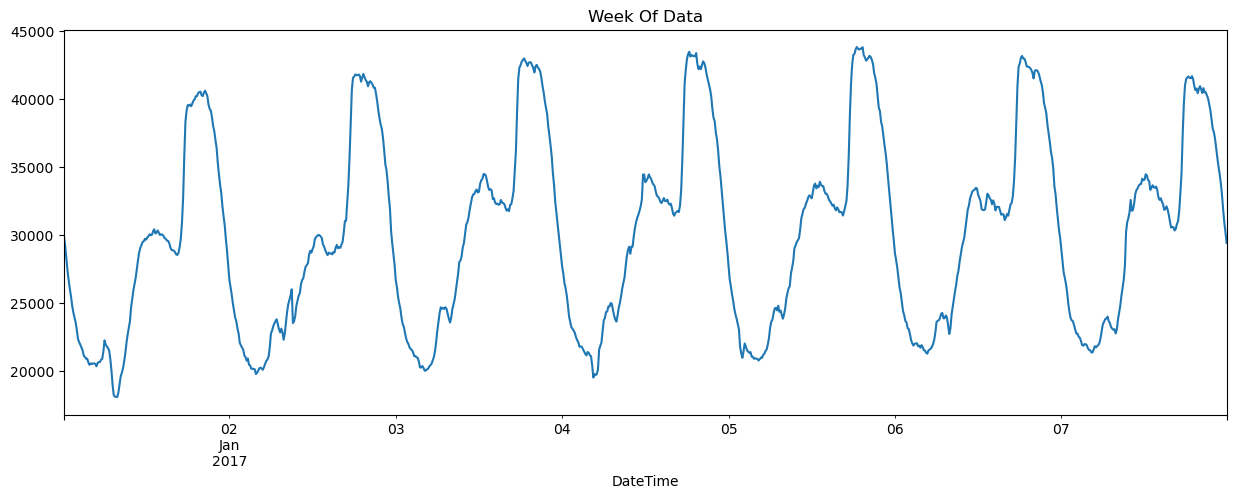

In [25]:
data['Zone 1 Power Consumption'].loc[(data.index > '01-01-2017') & (data.index < '01-08-2017')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [26]:
#defining input and target variable
X_train = df.loc['01-15-2017 00:00:00':'10-01-2017 00:00:00',['Temperature','dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'SMA30','SMA15']]
Y_train = df.loc['01-15-2017 00:00:00':'10-01-2017 00:00:00', ['Zone 1 Power Consumption']]
X_test = df.loc['10-01-2017 00:10:00':,['Temperature','dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'SMA30','SMA15']]
Y_test = df.loc['10-01-2017 00:10:00':, ['Zone 1 Power Consumption']]

In [27]:
X_test

Temperature  dayofyear  hour  dayofweek  quarter  month  \
DateTime                                                                       
2017-10-01 00:10:00       18.000        274     0          6        4     10   
2017-10-01 00:20:00       18.010        274     0          6        4     10   
2017-10-01 00:30:00       18.160        274     0          6        4     10   
2017-10-01 00:40:00       18.180        274     0          6        4     10   
2017-10-01 00:50:00       18.290        274     0          6        4     10   
...                          ...        ...   ...        ...      ...    ...   
2017-12-30 23:10:00        7.010        364    23          5        4     12   
2017-12-30 23:20:00        6.947        364    23          5        4     12   
2017-12-30 23:30:00        6.900        364    23          5        4     12   
2017-12-30 23:40:00        6.758        364    23          5        4     12   
2017-12-30 23:50:00        6.580        364    23          5        4     12   

                            SMA30         SMA15  
DateTime                                         
2017-10-01 00:10:00  38817.290757  36110.333727  
2017-10-01 00:20:00  38416.861951  35444.130981  
2017-10-01 00:30:00  38007.019693  34758.676555  
2017-10-01 00:40:00  37591.290951  34120.068627  
2017-10-01 00:50:00  37170.149300  33485.926917  
...                           ...           ...  
2017-12-30 23:10:00  35936.121673  34403.447401  
2017-12-30 23:20:00  35683.041825  33990.570342  
2017-12-30 23:30:00  35402.382763  33540.380227  
2017-12-30 23:40:00  35107.528517  33082.078579  
2017-12-30 23:50:00  34796.451204  32597.820025  

[13103 rows x 8 columns]

In [28]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(37297, 8) (37297, 1) (13103, 8) (13103, 1)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.linear_model import RidgeCV, LassoCV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [71]:
# list of models
names=['LinearRegression','DecisionTreeRegressor','Support Vector Regressor','Random Forest Regressor','XGBRegressor','KNeighborsRegressor','Lasso','Ridge']
regression=[LinearRegression(),DecisionTreeRegressor(random_state = 0),SVR(kernel='linear'),RandomForestRegressor(random_state = 0),XGBRegressor(),neighbors.KNeighborsRegressor(n_neighbors = 20),Lasso(),Ridge()]

In [72]:
MAEs=[]
RMSEs=[]
R2s=[]

for name,reg in zip(names,regression):
    reg.fit(X_train,Y_train)
    pred=reg.predict(X_test)
        
       
    MAE= mean_absolute_error(Y_test,pred)
    MAEs.append(MAE)
    RMSE=np.sqrt(mean_squared_error(Y_test,pred))
    RMSEs.append(RMSE)
    R2_Score=r2_score(Y_test,pred)
    R2s.append(R2_Score)
    
df1=pd.DataFrame()
df1['name']=names
df1['MAE']=MAEs
df1['RMSE']=RMSEs
df1['R2']=R2s
df1

name          MAE         RMSE        R2
0          LinearRegression  1473.886114  2001.534805  0.903885
1     DecisionTreeRegressor  1839.404848  2537.534255  0.845513
2  Support Vector Regressor  1701.716043  2171.341665  0.886884
3   Random Forest Regressor  1491.123563  2121.187236  0.892049
4              XGBRegressor  1489.858775  2028.918226  0.901237
5       KNeighborsRegressor  1690.585656  2188.135147  0.885128
6                     Lasso  1476.336694  2002.950032  0.903749
7                     Ridge  1473.887875  2001.535919  0.903884

In [40]:
# list of models
models_list = [DecisionTreeRegressor(random_state = 0),RandomForestRegressor(random_state = 0),XGBRegressor()]

In [33]:
model_hyperparameters = {
    

    'DecisionTreeRegressor_hp': {
        'criterion': ['squared_error', 'poisson'],
        'max_depth': [ 10,11,12],
        'max_features': ['auto', 'sqrt', 'log2'],},

   "RandomForestRegressor_hp":{'max_depth': [20, 30,50,None],
                               'max_features': ['auto', 'sqrt'],
                               'n_estimators': [ 200, 300, 500]},
    'XGB_HP':{
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    
}

In [34]:
type(model_hyperparameters)

dict

In [35]:
print(model_hyperparameters.keys())

dict_keys(['DecisionTreeRegressor_hp', 'RandomForestRegressor_hp', 'XGB_HP'])


In [36]:
model_hyperparameters['DecisionTreeRegressor_hp']

{'criterion': ['squared_error', 'poisson'],
 'max_depth': [10, 11, 12],
 'max_features': ['auto', 'sqrt', 'log2']}

In [37]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['DecisionTreeRegressor_hp', 'RandomForestRegressor_hp', 'XGB_HP']


In [38]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    Regressor = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    Regressor.fit(X_train,Y_train)

    result.append({
        'model used' : model,
        'highest score' : Regressor.best_score_,
        'best hyperparameters' : Regressor.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [39]:
ModelSelection(models_list, model_hyperparameters)

DecisionTreeRegressor(random_state=0)
{'criterion': ['squared_error', 'poisson'], 'max_depth': [10, 11, 12], 'max_features': ['auto', 'sqrt', 'log2']}
---------------------------------
RandomForestRegressor(random_state=0)
{'max_depth': [20, 30, 50, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [200, 300, 500]}
---------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None

model used  highest score  \
0              DecisionTreeRegressor(random_state=0)       0.927473   
1              RandomForestRegressor(random_state=0)       0.948630   
2  XGBRegressor(base_score=None, booster=None, ca...       0.960015   

                                best hyperparameters  
0  {'criterion': 'squared_error', 'max_depth': 11...  
1  {'max_depth': 30, 'max_features': 'sqrt', 'n_e...  
2  {'colsample_bytree': 0.7, 'learning_rate': 0.1...

In [31]:
model1=LinearRegression()
model1.fit(X_train,Y_train)
Y_test = pd.DataFrame(Y_test)
Y_test['lr_prediction'] = model1.predict(X_test)
df = df.merge(Y_test[['lr_prediction']], how='left', left_index=True, right_index=True)

MAE= mean_absolute_error(Y_test['Zone 1 Power Consumption'],Y_test['lr_prediction'])
print(f"MAE_Score: {MAE}")

score = np.sqrt(mean_squared_error(Y_test['Zone 1 Power Consumption'],Y_test['lr_prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

R2_score=r2_score(Y_test['Zone 1 Power Consumption'],Y_test['lr_prediction'])
print("R2 score :",R2_score)


MAE_Score: 1473.8861139826065
RMSE Score on Test set: 2001.53
R2 score : 0.9038845664900597


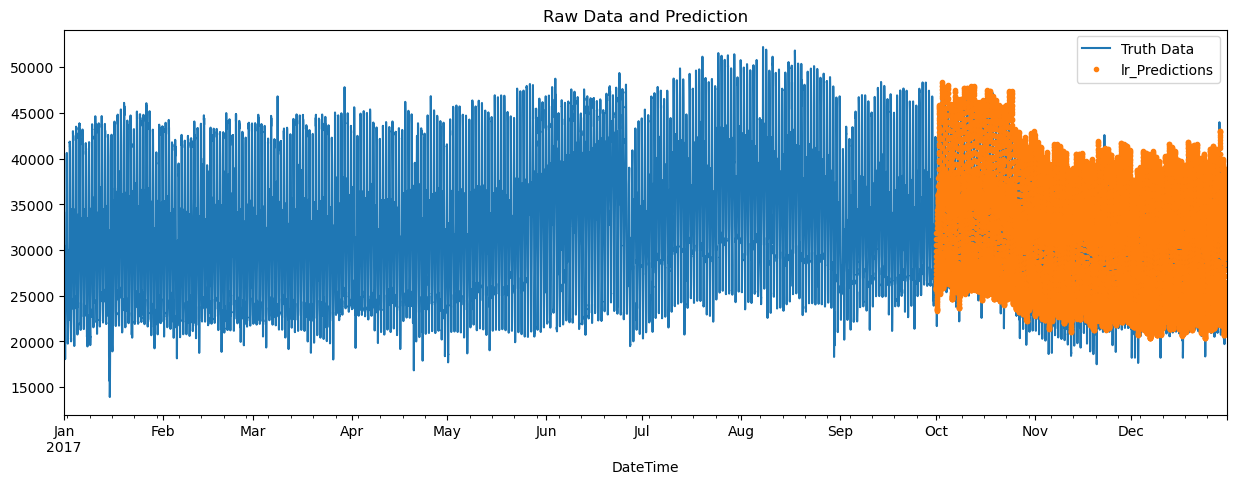

In [32]:
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['lr_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'lr_Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

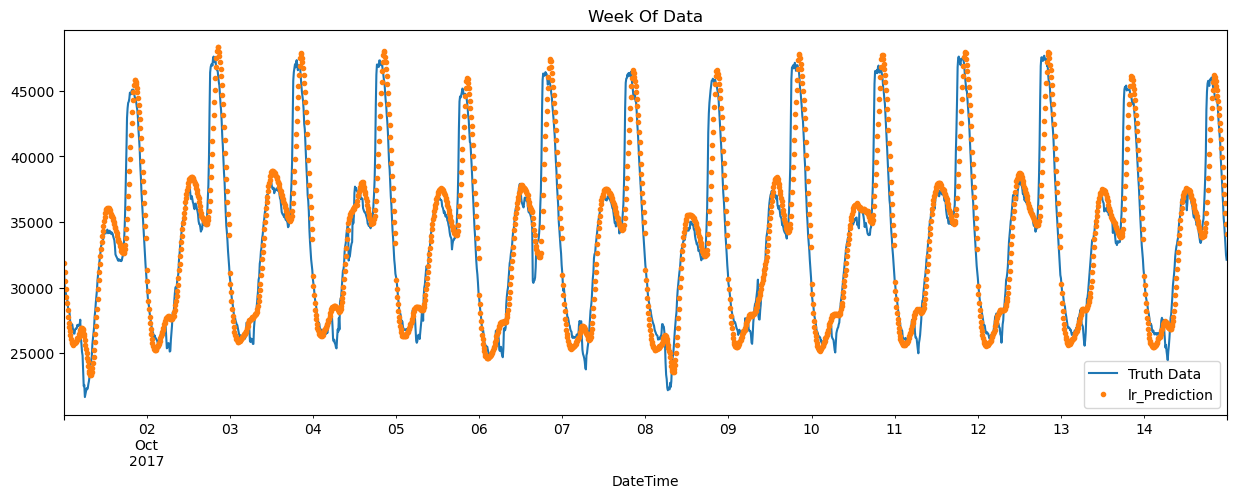

In [80]:
ax = df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['lr_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','lr_Prediction'])
plt.show()

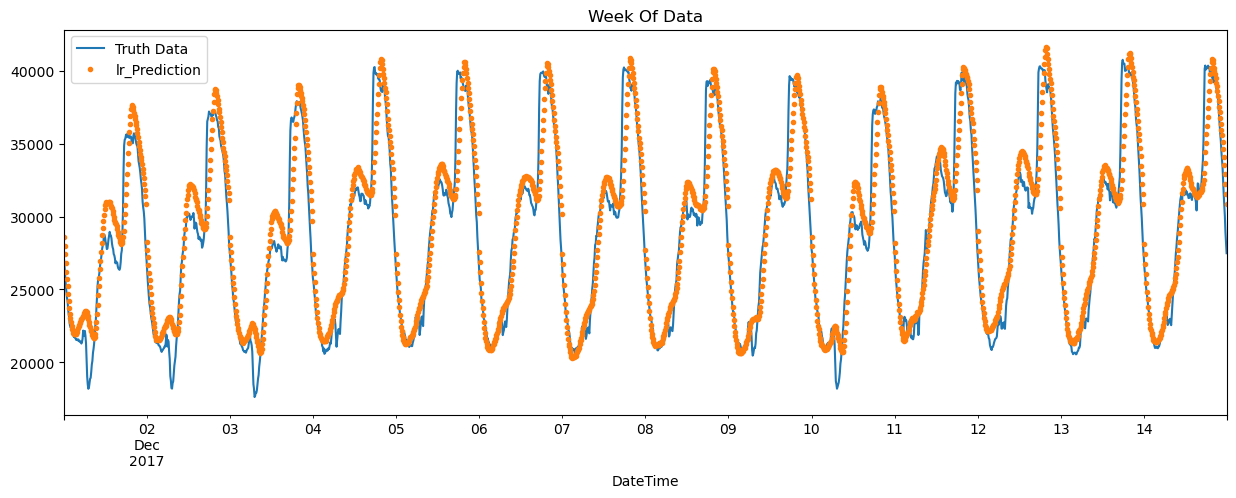

In [81]:
ax = df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['lr_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','lr_Prediction'])
plt.show()

# Decision Tree Regressor

In [33]:
model2=DecisionTreeRegressor(random_state = 0)
model2.fit(X_train,Y_train)
Y_test = pd.DataFrame(Y_test)
Y_test['dtr_prediction'] = model2.predict(X_test)
df = df.merge(Y_test[['dtr_prediction']], how='left', left_index=True, right_index=True)

MAE= mean_absolute_error(Y_test['Zone 1 Power Consumption'],Y_test['dtr_prediction'])
print(f"MAE_Score: {MAE}")

score = np.sqrt(mean_squared_error(Y_test['Zone 1 Power Consumption'],Y_test['dtr_prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

R2_score=r2_score(Y_test['Zone 1 Power Consumption'],Y_test['dtr_prediction'])
print("R2 score : ",R2_score)

MAE_Score: 1839.4048480515912
RMSE Score on Test set: 2537.53
R2 score :  0.845513454105103


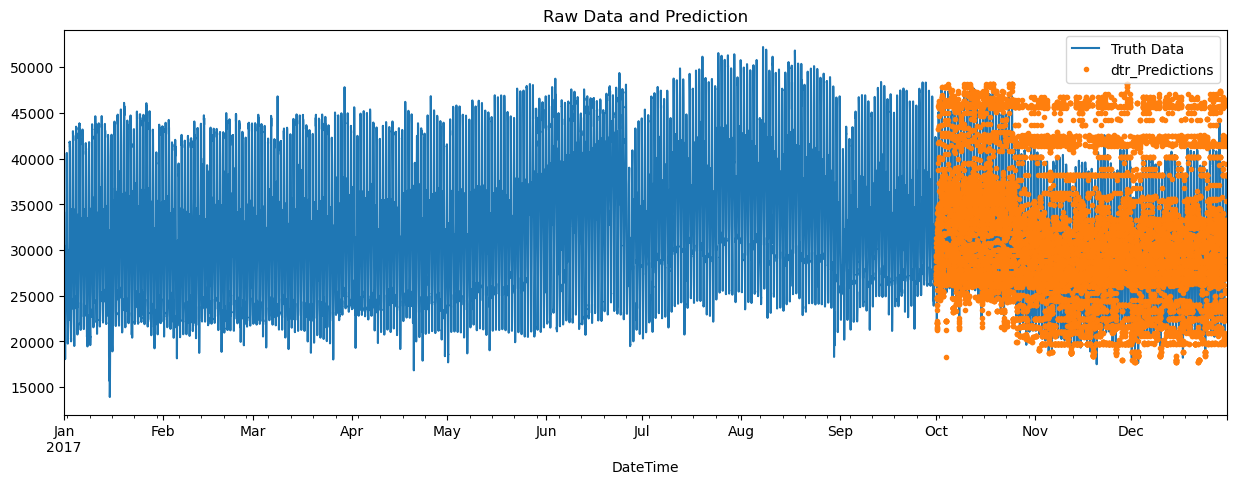

In [34]:
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['dtr_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'dtr_Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

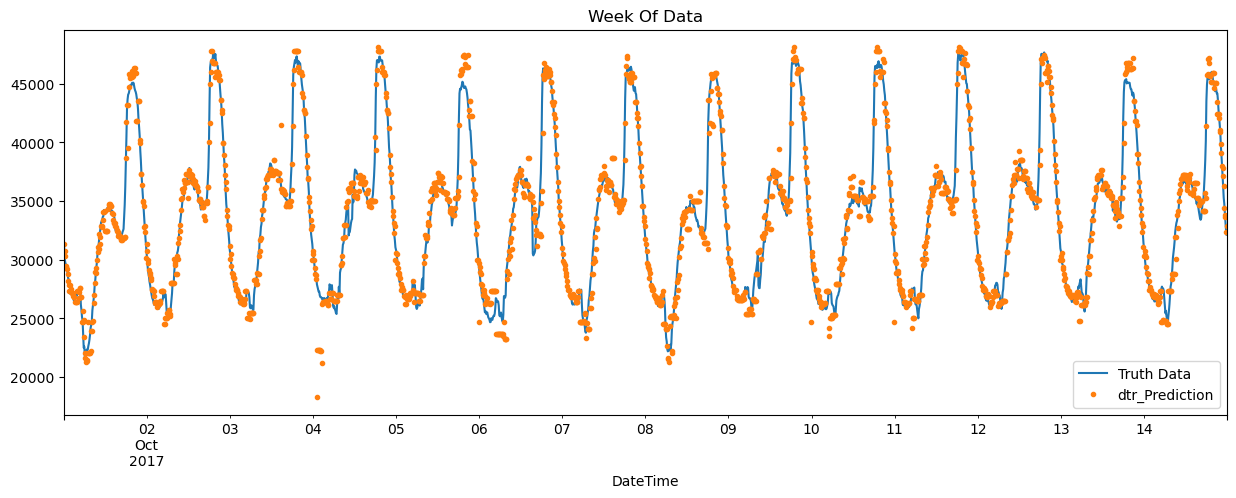

In [133]:
ax = df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['dtr_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','dtr_Prediction'])
plt.show()

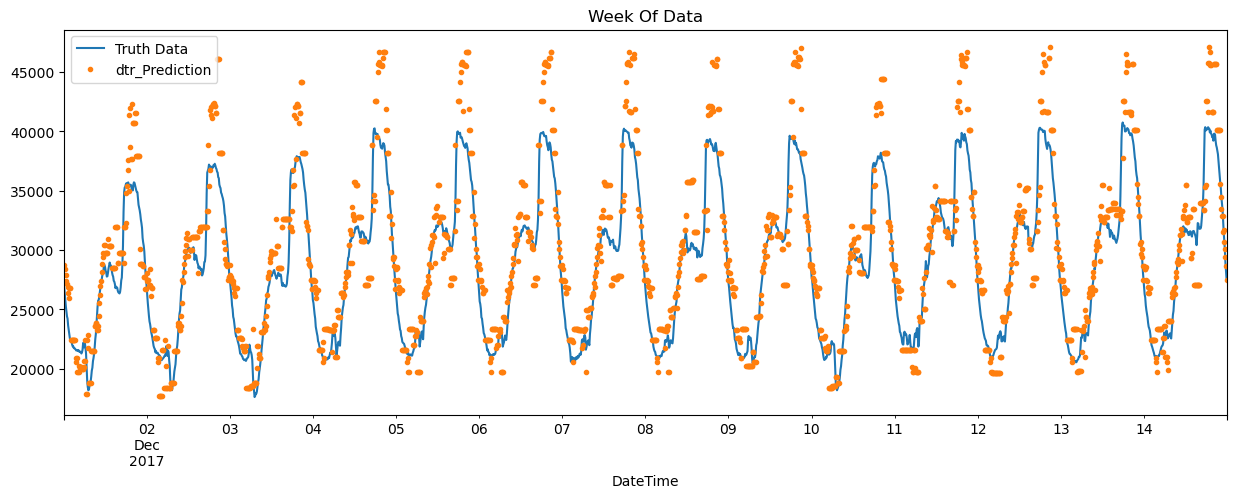

In [134]:
ax = df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['dtr_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','dtr_Prediction'])
plt.show()

# Hypertuning parameters for Decsison Tree Regression

In [35]:
model2=DecisionTreeRegressor(criterion='squared_error',max_depth=11,max_features='auto',splitter='best',random_state = 0)
model2.fit(X_train,Y_train)
Y_test = pd.DataFrame(Y_test)
Y_test['dtr1_prediction'] = model2.predict(X_test)
df = df.merge(Y_test[['dtr1_prediction']], how='left', left_index=True, right_index=True)

MAE= mean_absolute_error(Y_test['Zone 1 Power Consumption'],Y_test['dtr1_prediction'])
print(f"MAE_Score: {MAE}")

score = np.sqrt(mean_squared_error(Y_test['Zone 1 Power Consumption'],Y_test['dtr1_prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

R2_score=r2_score(Y_test['Zone 1 Power Consumption'],Y_test['dtr1_prediction'])
print("R2 score :",R2_score)

MAE_Score: 1685.8157708700217
RMSE Score on Test set: 2418.01
R2 score : 0.8597246364627769


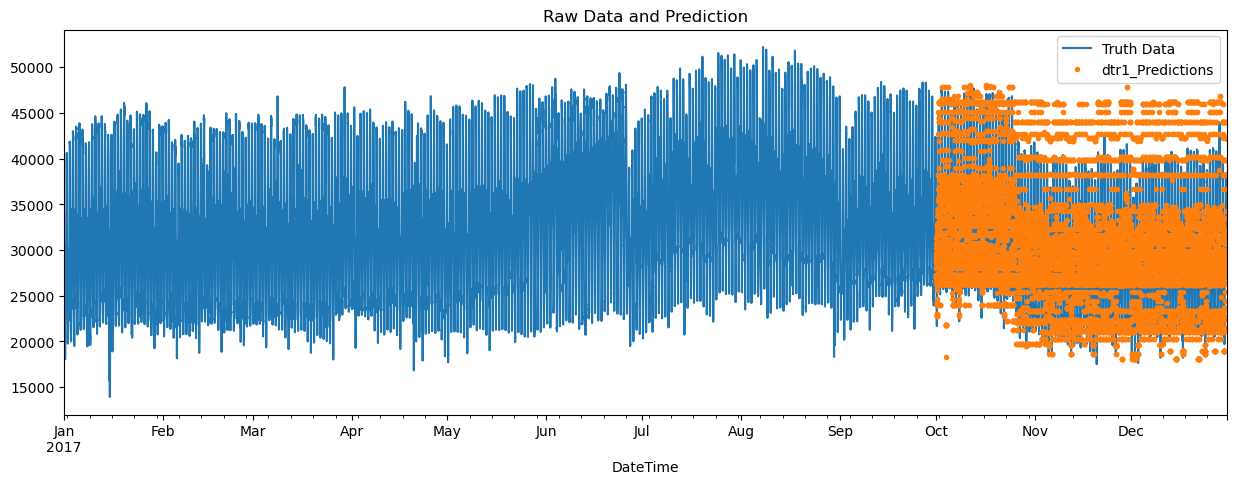

In [36]:
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['dtr1_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'dtr1_Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

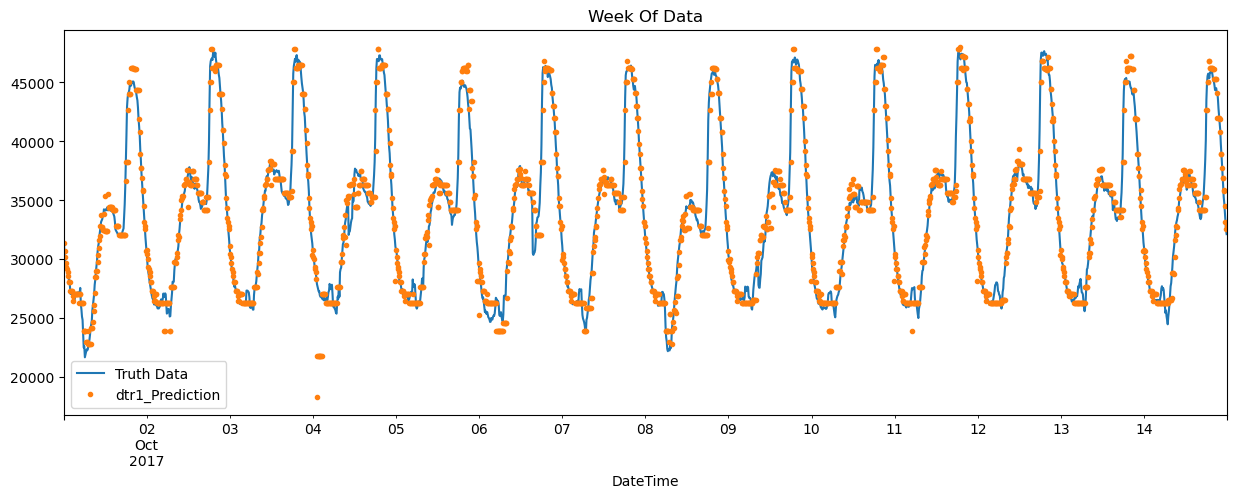

In [89]:
ax = df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['dtr1_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','dtr1_Prediction'])
plt.show()

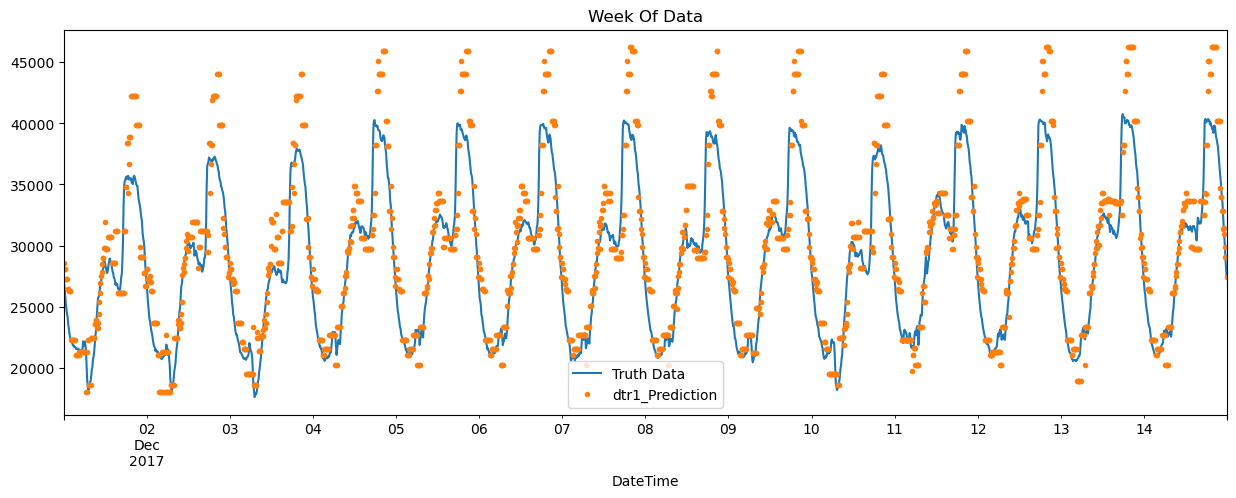

In [88]:
ax = df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['dtr1_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','dtr1_Prediction'])
plt.show()

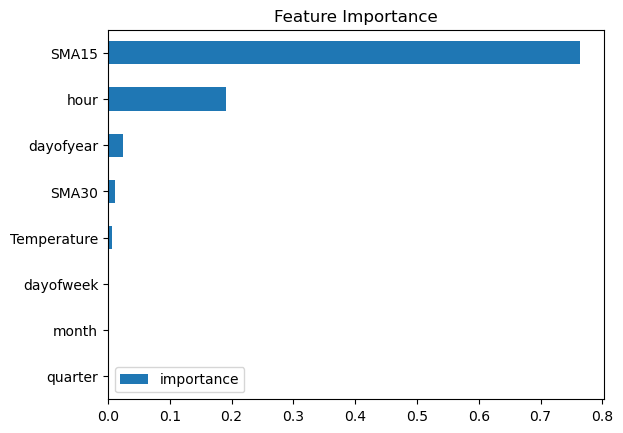

In [99]:
fi = pd.DataFrame(data=model2.feature_importances_,
             index=model2.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Support Vector Regressor

In [37]:
model3=SVR(kernel='linear')
model3.fit(X_train,Y_train)
Y_test = pd.DataFrame(Y_test)
Y_test['svm_prediction'] = model3.predict(X_test)
df = df.merge(Y_test[['svm_prediction']], how='left', left_index=True, right_index=True)

MAE= mean_absolute_error(Y_test['Zone 1 Power Consumption'],Y_test['svm_prediction'])
print(f"MAE_Score: {MAE}")

score = np.sqrt(mean_squared_error(Y_test['Zone 1 Power Consumption'],Y_test['svm_prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

R2_score=r2_score(Y_test['Zone 1 Power Consumption'],Y_test['svm_prediction'])
print("R2 score :",R2_score)

MAE_Score: 1701.7160426353123
RMSE Score on Test set: 2171.34
R2 score : 0.8868842269810375


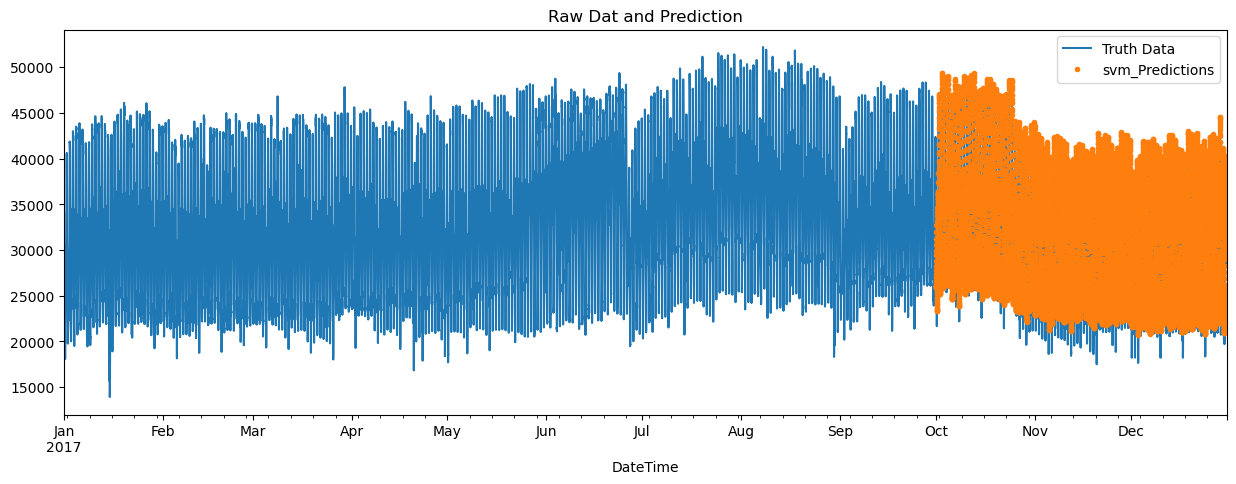

In [159]:
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['svm_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'svm_Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

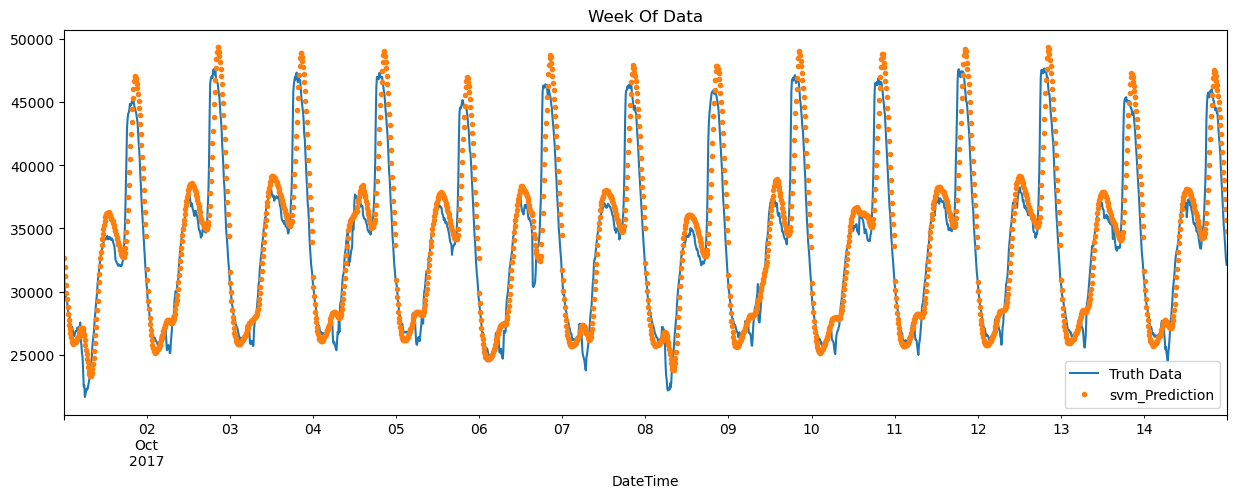

In [160]:
ax = df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['svm_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','svm_Prediction'])
plt.show()

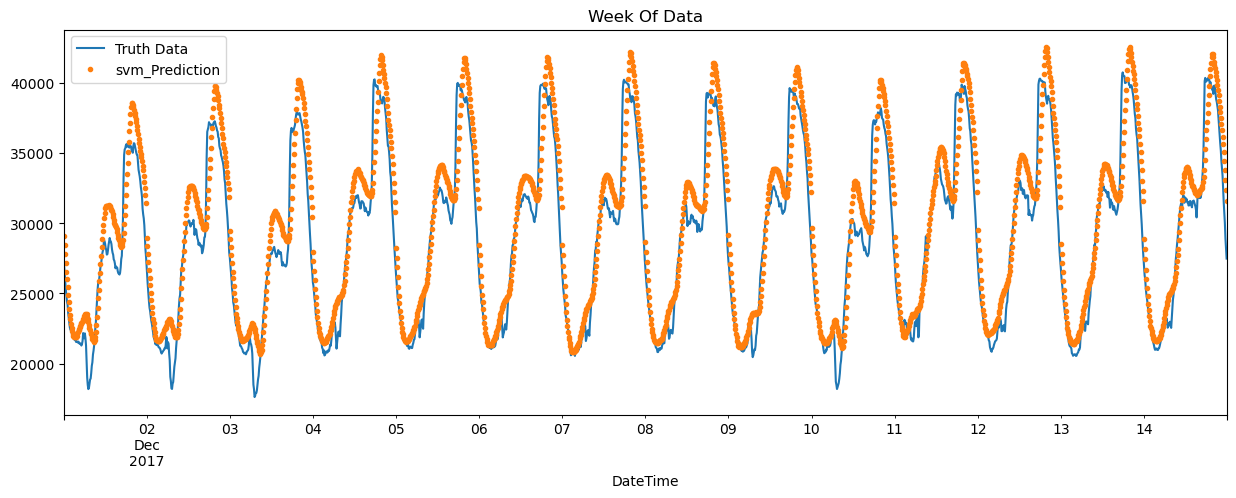

In [161]:
ax = df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['svm_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','svm_Prediction'])
plt.show()

# Random Forest Regressor

In [92]:
model4=RandomForestRegressor(max_depth=30,n_estimators= 200,random_state = 0)
model4.fit(X_train,Y_train)
Y_test = pd.DataFrame(Y_test)
Y_test['rf_prediction'] = model4.predict(X_test)
df = df.merge(Y_test[['rf_prediction']], how='left', left_index=True, right_index=True)

MAE= mean_absolute_error(Y_test['Zone 1 Power Consumption'],Y_test['rf_prediction'])
print(f"MAE_Score: {MAE}")

score = np.sqrt(mean_squared_error(Y_test['Zone 1 Power Consumption'],Y_test['rf_prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

R2_score=r2_score(Y_test['Zone 1 Power Consumption'],Y_test['rf_prediction'])
print("R2 score :",R2_score)

MAE_Score: 1485.6383562568103
RMSE Score on Test set: 2105.79
R2 score : 0.8936110709951818


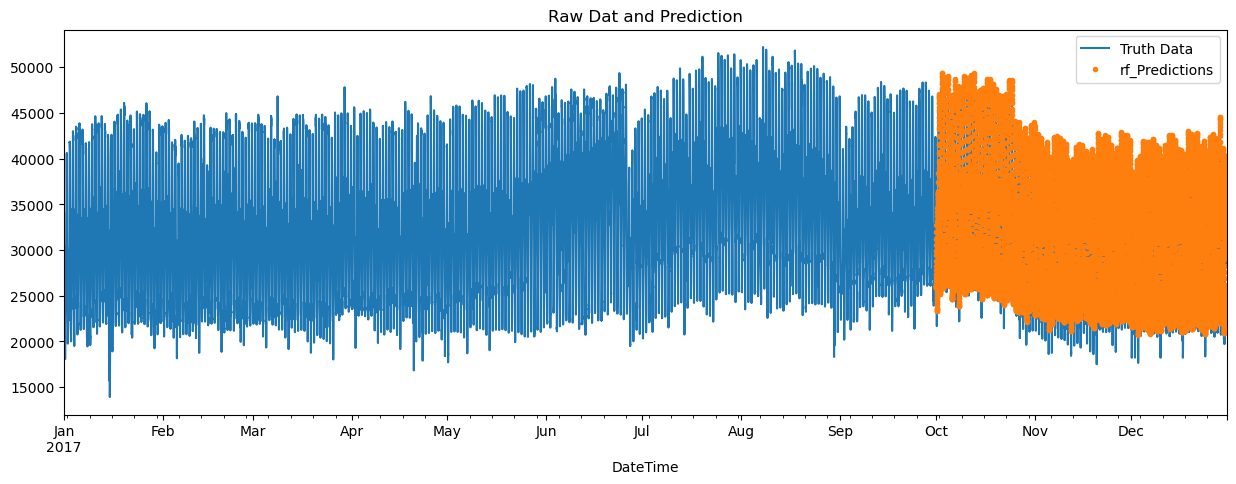

In [165]:
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['svm_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'rf_Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

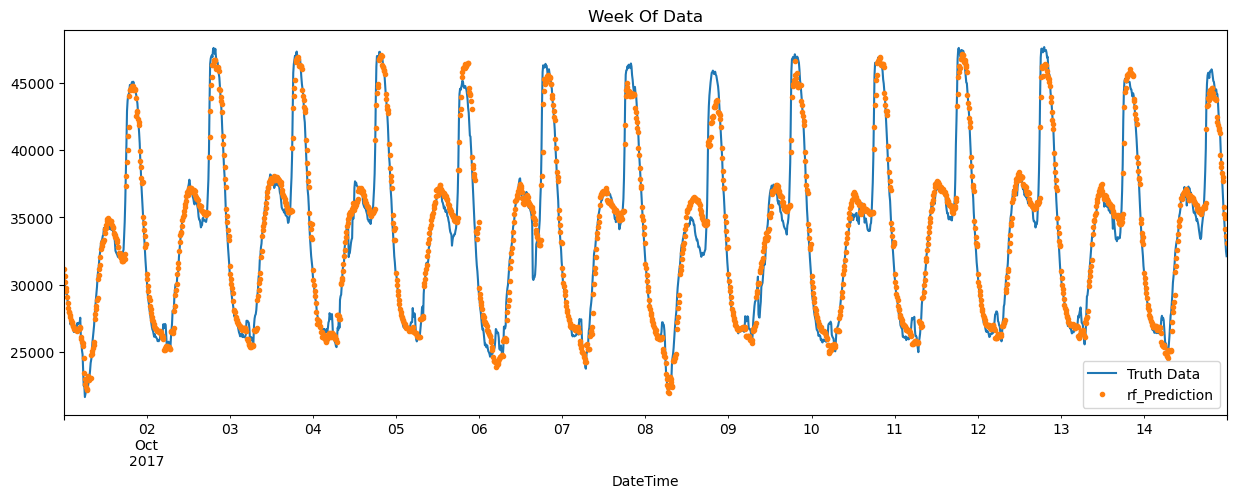

In [166]:
ax = df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['rf_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','rf_Prediction'])
plt.show()

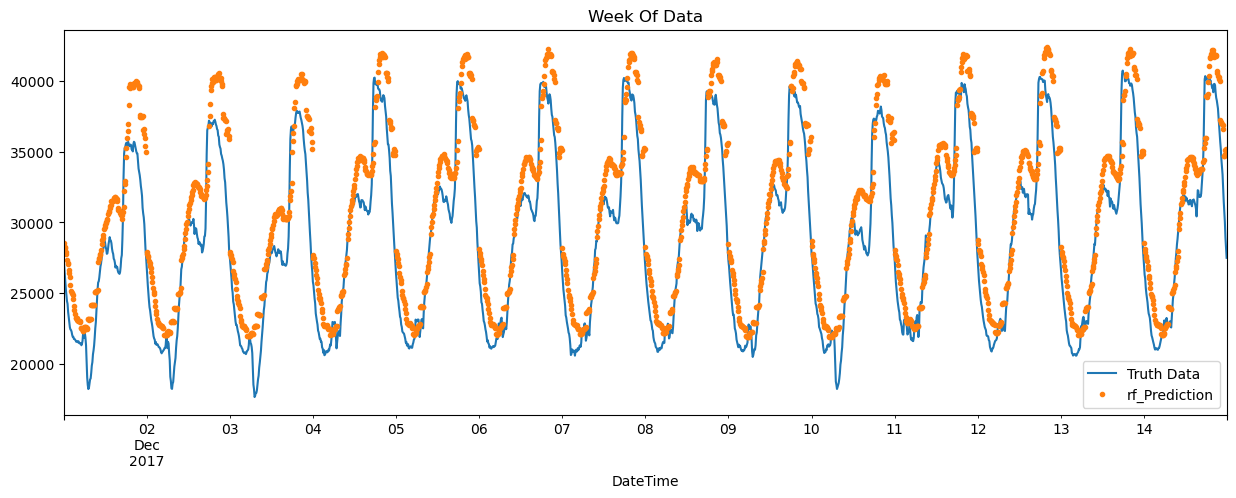

In [167]:
ax = df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['rf_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','rf_Prediction'])
plt.show()

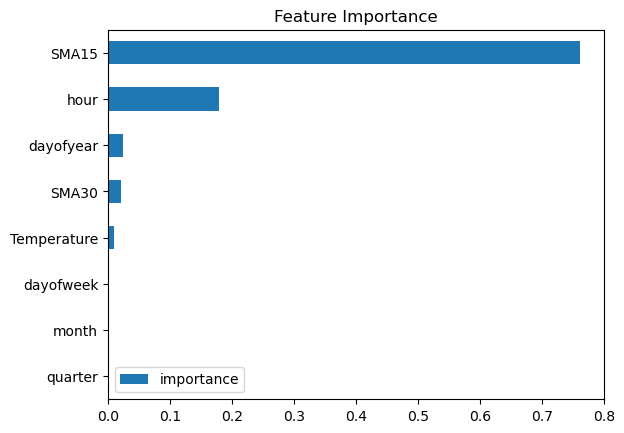

In [101]:
fi = pd.DataFrame(data=model4.feature_importances_,
             index=model4.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Extrem Gradient Boost Regressor

In [173]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,Y_train)

    return gsearch.best_params_

In [174]:
hyperParameterTuning(X_train, Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [136]:
model5=XGBRegressor(colsample_bytree= 0.7,
 learning_rate= 0.1,
 max_depth= 7,
 min_child_weight= 5,
 n_estimators=200,
 objective= 'reg:squarederror',
 subsample= 0.5)
model5.fit(X_train,Y_train)
Y_test = pd.DataFrame(Y_test)
Y_test['xgb_prediction'] = model5.predict(X_test)
df = df.merge(Y_test[['xgb_prediction']], how='left', left_index=True, right_index=True)

MAE= mean_absolute_error(Y_test['Zone 1 Power Consumption'],Y_test['xgb_prediction'])
print(f"MAE_Score: {MAE}")

score = np.sqrt(mean_squared_error(Y_test['Zone 1 Power Consumption'],Y_test['xgb_prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

R2_score=r2_score(Y_test['Zone 1 Power Consumption'],Y_test['xgb_prediction'])
print("R2 score :",R2_score)

MAE_Score: 1400.4387392143021
RMSE Score on Test set: 1970.60
R2 score : 0.9068330428715762


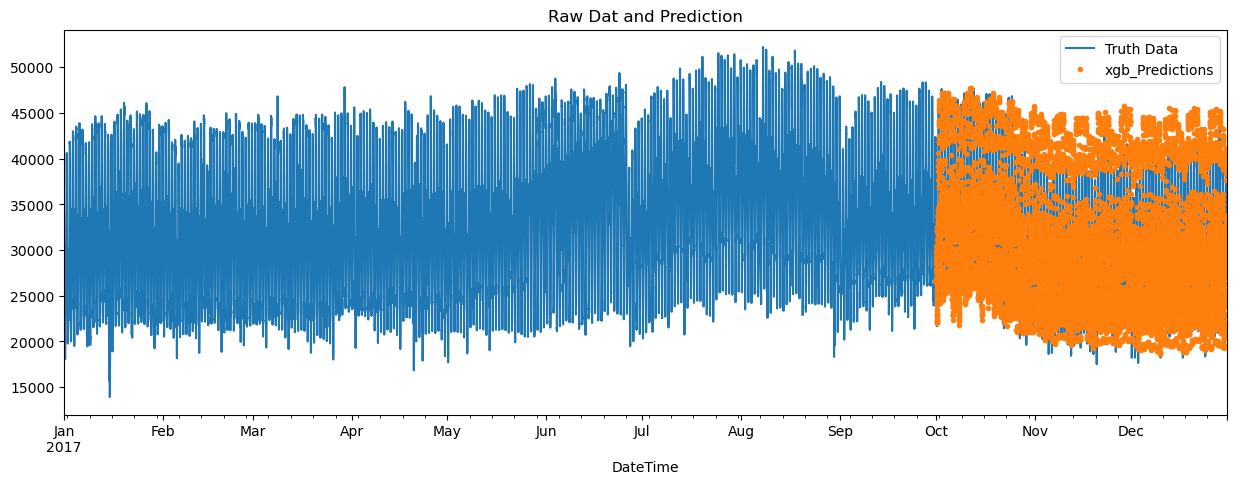

In [214]:
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['xgb_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'xgb_Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

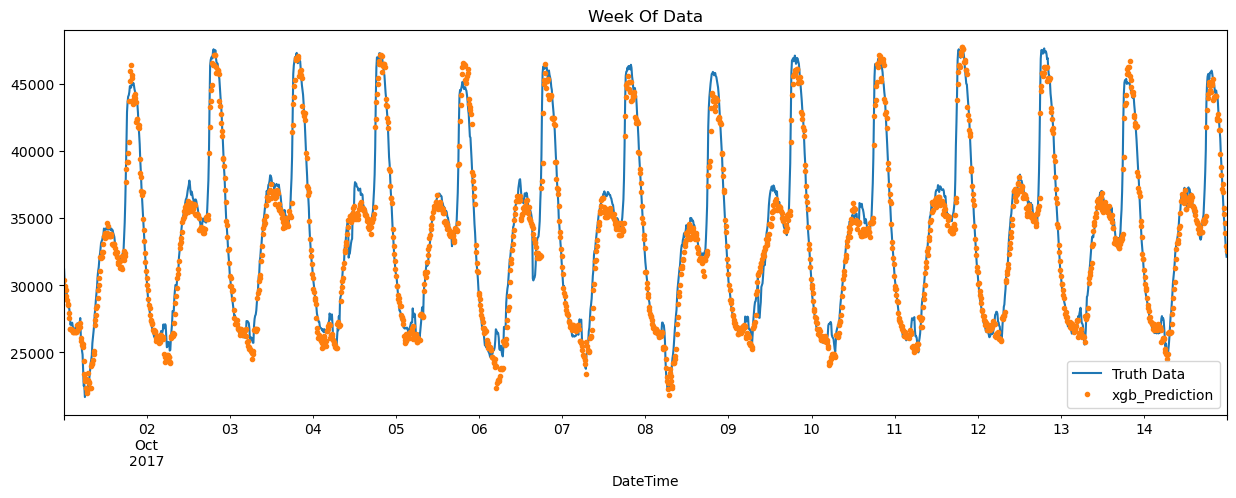

In [215]:
ax = df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['xgb_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','xgb_Prediction'])
plt.show()

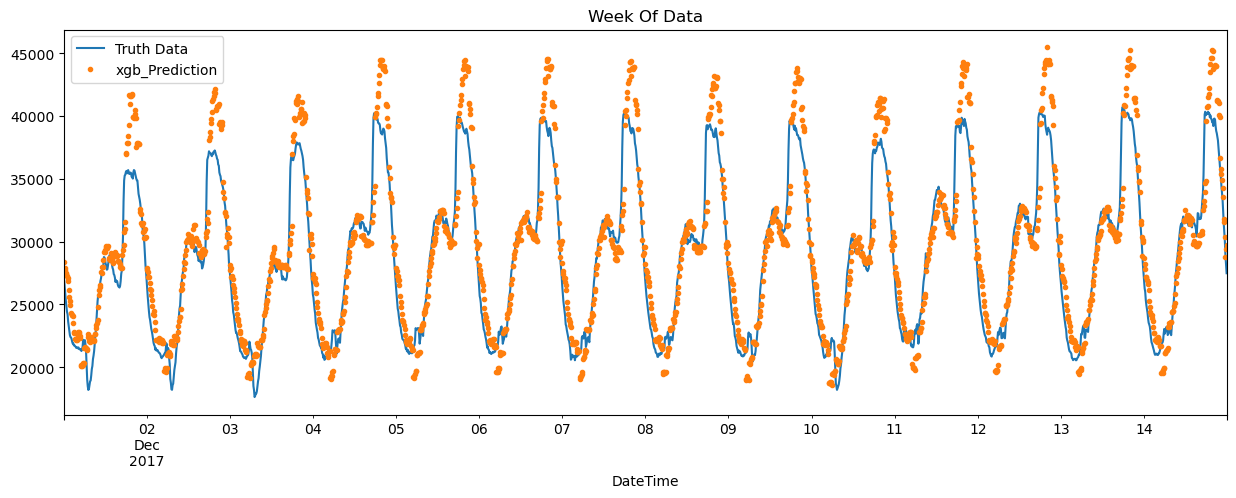

In [216]:
ax = df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['xgb_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','xgb_Prediction'])
plt.show()

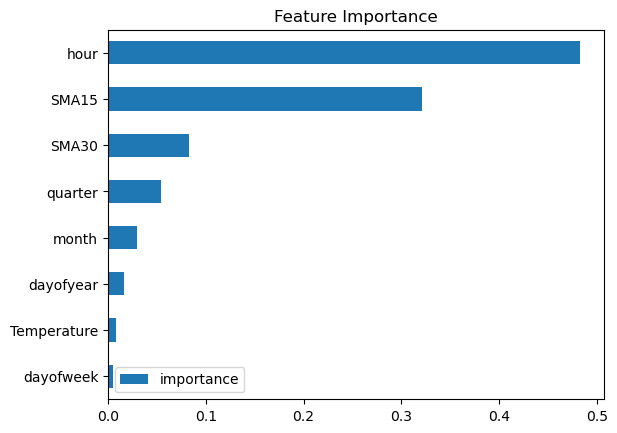

In [105]:
fi = pd.DataFrame(data=model5.feature_importances_,
             index=model5.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# K Nearest Neigbhors Regressor

In [123]:
#knn hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {'n_neighbors' : [100,150,200],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

    knn_model = neighbors.KNeighborsRegressor()

    gsearch = GridSearchCV(estimator = knn_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,Y_train)

    return gsearch.best_params_

In [124]:
hyperParameterTuning(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'metric': 'manhattan', 'n_neighbors': 100, 'weights': 'distance'}

In [142]:
model6=neighbors.KNeighborsRegressor(n_neighbors = 100,metric ='manhattan',weights='distance')
model6.fit(X_train,Y_train)
Y_test = pd.DataFrame(Y_test)
Y_test['knn_prediction'] = model6.predict(X_test)
df = df.merge(Y_test[['knn_prediction']], how='left', left_index=True, right_index=True)

MAE= mean_absolute_error(Y_test['Zone 1 Power Consumption'],Y_test['knn_prediction'])
print(f"MAE_Score: {MAE}")

score = np.sqrt(mean_squared_error(Y_test['Zone 1 Power Consumption'],Y_test['knn_prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

R2_score=r2_score(Y_test['Zone 1 Power Consumption'],Y_test['knn_prediction'])
print("R2 score",R2_score)

MAE_Score: 1635.6111204088736
RMSE Score on Test set: 2126.25
R2 score 0.8915333426349616


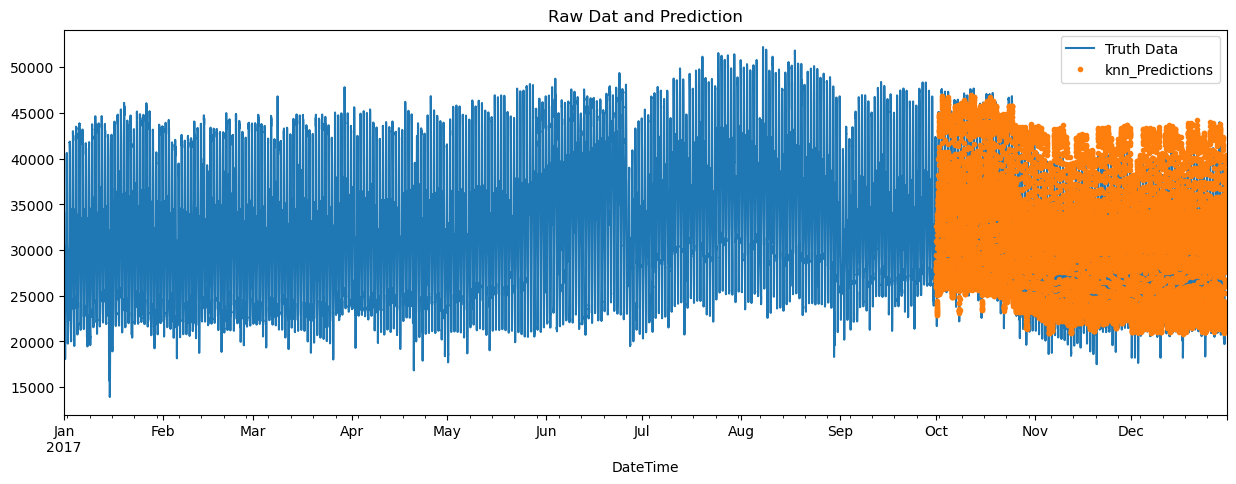

In [221]:
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['knn_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'knn_Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

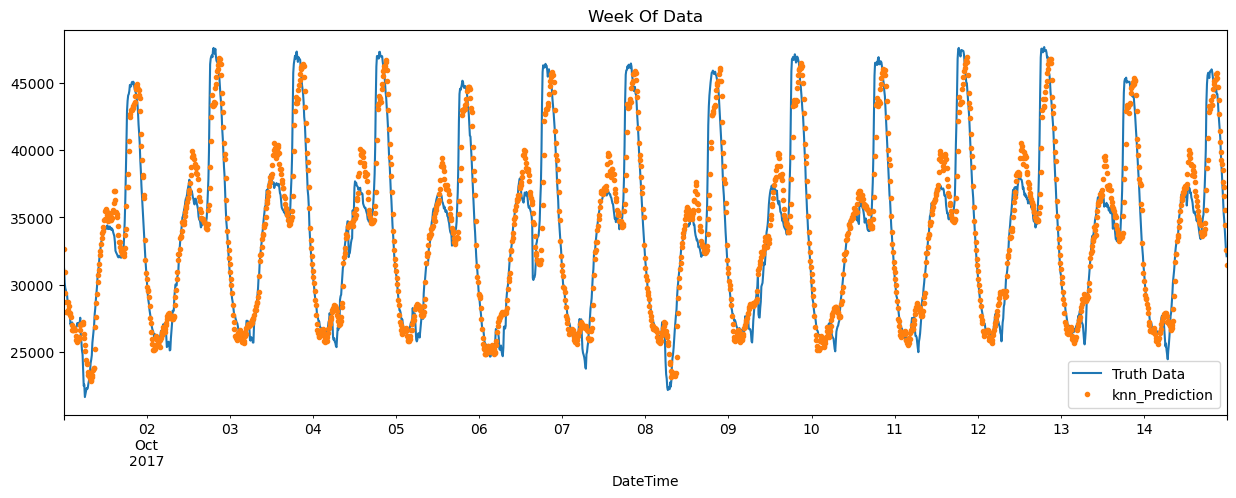

In [222]:
ax = df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]['knn_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','knn_Prediction'])
plt.show()

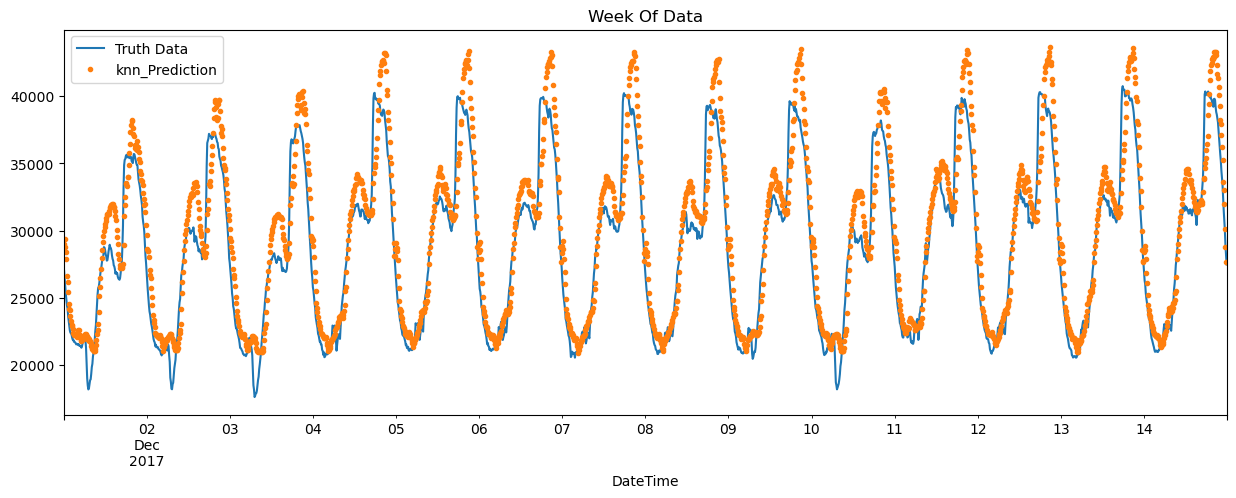

In [223]:
ax = df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['Zone 1 Power Consumption'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]['knn_prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','knn_Prediction'])
plt.show()

# END